
#  Attrition Analysis and Insights for Faculty of Engineering

**Author:** Omkar Masurekar

**Description:** This notebook addresses the HR Business Partner’s request to analyze staff attrition within the Faculty of Engineering. It includes data cleaning, transformation, and explorations.




In [40]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [41]:
df= pd.read_csv(r"./test_dataset.csv")

In [42]:
df

,FirstName,LastName,StartDate,ExitDate,PositionTitle,Supervisor,ADEmail,Faculty,EmployeeStatus,EmployeeType,TerminationType,DOB,JobFunction,GenderCode,Current Employee Rating,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,StaffType
0,Aaden,Mercer,26-Jul-23,NaN,Senior Research Fellow,Victoria Jacobs,aaden.mercer@bilearner.com,Faculty of Medicine,Active,Part-Time,Unk,25/9/1983,Senior Research Fellow,Female,3,1808,25/4/2023,5,2,4,Academic
1,Aaliyah,Watts,9-May-20,NaN,Senior Lecturer,Jared Whitehead,aaliyah.watts@bilearner.com,Faculty of Medicine,Active,Contract,Unk,11/4/1962,Senior Lecturer,Male,3,3783,7/3/2023,3,4,3,Academic
2,Aarav,Espinoza,11-Nov-19,NaN,Officer,David Ali,aarav.espinoza@bilearner.com,Faculty of Arts,Active,Part-Time,Unk,15/12/1999,Administration-Officer,Male,2,2956,6/2/2023,5,4,1,Professional
3,Aaron,Tapia,20-Jan-23,NaN,Officer,Michael Reed,aaron.tapia@bilearner.com,Faculty of Arts,Active,Contract,Unk,18/1/2001,Student Services-Officer,Male,3,1538,11/11/2022,2,4,5,Professional
4,Aaron,Weber,6-Apr-20,24-Jul-23,Lecturer,Melanie Garcia,aaron.weber@bilearner.com,Faculty of Engineering,Active,Full-Time,Involuntary,27/10/1991,Lecturer,Male,2,3541,28/11/2022,1,3,3,Academic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Zoey,Page,6-May-19,9-Apr-22,Professor,William Newman,zoey.page@bilearner.com,Faculty of Engineering,Active,Contract,Resignation,7/1/1987,Professor,Female,3,1817,28/2/2023,3,1,5,Academic
2996,Zoey,Spence,6-May-20,NaN,Senior Lecturer,Ian Price,zoey.spence@bilearner.com,Faculty of Medicine,Active,Full-Time,Unk,8/12/1955,Senior Lecturer,Male,3,1492,17/4/2023,4,5,2,Academic
2997,Zoie,Logan,19-Apr-19,NaN,Lecturer,Heidi Terry,zoie.logan@bilearner.com,Faculty of Engineering,Active,Part-Time,Unk,17/9/1990,Lecturer,Male,1,3388,9/10/2022,3,1,3,Academic
2998,Zoie,Mercado,1-Dec-20,NaN,Lecturer,David Young,zoie.mercado@bilearner.com,Faculty of Medicine,Active,Contract,Unk,19/8/1944,Lecturer,Female,3,1489,13/10/2022,3,5,2,Academic


## Time-Based Features

In [43]:
# Convert string dates to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d-%b-%y', errors='coerce')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], format='%d-%b-%y', errors='coerce')
df['Survey Date'] = pd.to_datetime(df['Survey Date'], format='%d/%m/%Y', errors='coerce')

# For rows where the above format fails (e.g., 25/9/1983), try alternative format
df['StartDate'] = df['StartDate'].fillna(pd.to_datetime(df['StartDate'], format='%d/%m/%Y', errors='coerce'))
df['ExitDate'] = df['ExitDate'].fillna(pd.to_datetime(df['ExitDate'], format='%d/%m/%Y', errors='coerce'))
df['Survey Date'] = df['Survey Date'].fillna(pd.to_datetime(df['Survey Date'], format='%d/%m/%Y', errors='coerce'))

In [44]:
print(df[['StartDate', 'ExitDate']].dtypes)

StartDate    datetime64[ns]
ExitDate     datetime64[ns]
dtype: object


In [45]:
print("Failed StartDate conversions:", df['StartDate'].isna().sum())
print("Failed ExitDate conversions:", df['ExitDate'].isna().sum())

Failed StartDate conversions: 0
Failed ExitDate conversions: 1467


In [46]:
# For current employees (no ExitDate), use today's date
current_date = pd.to_datetime('2025-05-17')  # Assuming analysis date
df['EmploymentDuration_months'] = np.where(
    df['ExitDate'].isna(),
    (current_date - df['StartDate']).dt.days / 30,  # Months for current employees
    (df['ExitDate'] - df['StartDate']).dt.days / 30  # Months for former employees
)

In [47]:
df['TerminationYear'] = df['ExitDate'].dt.year
df['TerminationYear'] = df['TerminationYear'].fillna('Active')
df['TerminationMonth'] = df['ExitDate'].dt.month
df['TerminationYearMonth'] = df['ExitDate'].dt.to_period('M')  

In [48]:
# Create tenure buckets
df['TenureGroup'] = pd.cut(df['EmploymentDuration_months'],
                          bins=[0,12,36,60,120,np.inf],
                          labels=['<1yr','1-3yrs','3-5yrs','5-10yrs','10+yrs'])
df['TenureGroup'] = df['TenureGroup'].cat.add_categories('0')
df['TenureGroup'] = df['TenureGroup'].fillna('0')


In [49]:
print(df[['StartDate', 'ExitDate', 'EmploymentDuration_months','TenureGroup']].head())

   StartDate   ExitDate  EmploymentDuration_months TenureGroup
0 2023-07-26        NaT                  22.033333      1-3yrs
1 2020-05-09        NaT                  61.133333     5-10yrs
2 2019-11-11        NaT                  67.133333     5-10yrs
3 2023-01-20        NaT                  28.266667      1-3yrs
4 2020-04-06 2023-07-24                  40.133333      3-5yrs


## Termination Analysis Features

In [50]:
df['EmploymentStatus'] = np.where(
    df['ExitDate'].isna(), 
    'Active', 
    'Terminated'
)

In [51]:
df['StatusValidated'] = np.where(
    (df['EmploymentStatus'] == 'Active') & df['ExitDate'].isna(),
    'Active',
    np.where(
        (df['EmploymentStatus'] != 'Active') & df['ExitDate'].notna(),
        'Terminated',
        'Status Conflict'  # Flag inconsistencies
    )
)

In [52]:
print(df['StatusValidated'].value_counts())

Terminated    1533
Active        1467
Name: StatusValidated, dtype: int64


In [53]:
df['TerminationCategory'] = np.where(
    df['ExitDate'].isna(),  # No exit date = active staff
    'Active',
    np.where(
        df['TerminationType'].isin(['Voluntary', 'Resignation']),
        'Voluntary Departure',
        np.where(
            df['TerminationType'] == 'Retirement',
            'Retirement',
            np.where(
                df['TerminationType'] == 'Involuntary',
                'Involuntary Departure',
                'Unclassified Departure'  # For terminated with unknown type
            )
        )
    )
)

df['VoluntaryTermination'] = np.where(
    df['TerminationCategory'] == 'Voluntary Departure', 1, 0)
df['InvoluntaryTermination'] = np.where(
    df['TerminationCategory'] == 'Involuntary Departure', 1, 0)
df['ActiveStaff'] = np.where(
    df['TerminationCategory'] == 'Active', 1, 0)
df['RetirementCategory'] = np.where(
    df['TerminationCategory'] == 'Retirement', 1, 0)
df['TerminatedStaff'] = df['ExitDate'].notna().astype(int)

# Employees who stayed >2 years
df['RetainedOver2Years'] = np.where(
    (df['EmploymentDuration_months'] > 24) & (df['TerminatedStaff'] == 0), 1, 0)

In [54]:
print(df['TerminationCategory'].value_counts())

Active                   1467
Voluntary Departure       768
Involuntary Departure     388
Retirement                377
Name: TerminationCategory, dtype: int64


In [55]:
#df.to_csv("./cleaned_test_csv.csv")

In [56]:
monthly_trends = (
    df.groupby('TerminationYearMonth')
      .agg(Terminations=('Employee ID', 'count'))
      .reset_index()
)

In [57]:
monthly_trends

,TerminationYearMonth,Terminations
0,2018-11,2
1,2018-12,2
2,2019-01,4
3,2019-02,3
4,2019-03,5
5,2019-04,6
6,2019-05,2
7,2019-06,2
8,2019-07,6
9,2019-08,7


In [58]:
# Calculate termination rates by faculty
faculty_terminations = df.groupby('Faculty').agg(
    TotalEmployees=('Employee ID', 'count'),
    Terminations=('TerminatedStaff', 'sum'),
    Voluntary=('VoluntaryTermination', 'sum'),
    Involuntary=('InvoluntaryTermination', 'sum'),
    Retirement=('RetirementCategory', 'sum'),
    ActiveStaff=('ActiveStaff', 'sum'),
    Retention=('RetainedOver2Years', 'mean')
).reset_index()

faculty_terminations['AttritionRate'] = (
    faculty_terminations['Terminations'] / faculty_terminations['TotalEmployees'] *100
)
faculty_terminations['ActiveRate'] = (
    faculty_terminations['ActiveStaff'] / faculty_terminations['TotalEmployees']*100
)
faculty_terminations['VoluntaryRate'] = (
    faculty_terminations['Voluntary'] / faculty_terminations['Terminations']*100
)
faculty_terminations['InvoluntaryRate'] = (
    faculty_terminations['Involuntary'] / faculty_terminations['Terminations']*100
)
faculty_terminations['RetirementRate'] = (
    faculty_terminations['Retirement'] / faculty_terminations['Terminations']*100
)
faculty_terminations['Retention_rate']=(faculty_terminations['Retention']*100)

In [59]:
faculty_terminations

,Faculty,TotalEmployees,Terminations,Voluntary,Involuntary,Retirement,ActiveStaff,Retention,AttritionRate,ActiveRate,VoluntaryRate,InvoluntaryRate,RetirementRate,Retention_rate
0,Faculty of Arts,591,306,142,85,79,285,0.458545,51.776650,48.223350,46.405229,27.777778,25.816993,45.854484
1,Faculty of Engineering,904,467,247,104,116,437,0.466814,51.659292,48.340708,52.890792,22.269807,24.839400,46.681416
2,Faculty of Medicine,1505,760,379,199,182,745,0.475083,50.498339,49.501661,49.868421,26.184211,23.947368,47.508306


In [60]:
#faculty_terminations.to_csv("./faculty_termibation_metrics.csv")

## Performance & Engagement Metrics

In [61]:
survey_metrics = df.melt(id_vars=['Employee ID','Faculty'], 
                        value_vars=['Engagement Score','Satisfaction Score','Work-Life Balance Score'],
                        var_name='Metric', 
                        value_name='Score')

In [62]:
survey_metrics

,Employee ID,Faculty,Metric,Score
0,1808,Faculty of Medicine,Engagement Score,5
1,3783,Faculty of Medicine,Engagement Score,3
2,2956,Faculty of Arts,Engagement Score,5
3,1538,Faculty of Arts,Engagement Score,2
4,3541,Faculty of Engineering,Engagement Score,1
...,...,...,...,...
8995,1817,Faculty of Engineering,Work-Life Balance Score,5
8996,1492,Faculty of Medicine,Work-Life Balance Score,2
8997,3388,Faculty of Engineering,Work-Life Balance Score,3
8998,1489,Faculty of Medicine,Work-Life Balance Score,2


In [63]:
df[['Engagement Score', 'Satisfaction Score']].corr()

,Engagement Score,Satisfaction Score
Engagement Score,1.000000,-0.007598
Satisfaction Score,-0.007598,1.000000


In [64]:
df.groupby('Faculty')[['Engagement Score', 'Satisfaction Score']].corr().unstack().iloc[:,1]


Faculty
Faculty of Arts          -0.005539
Faculty of Engineering   -0.013304
Faculty of Medicine      -0.004322
Name: (Engagement Score, Satisfaction Score), dtype: float64

Text(0.5, 1.0, 'Correlation Between Metrics and Attrition')

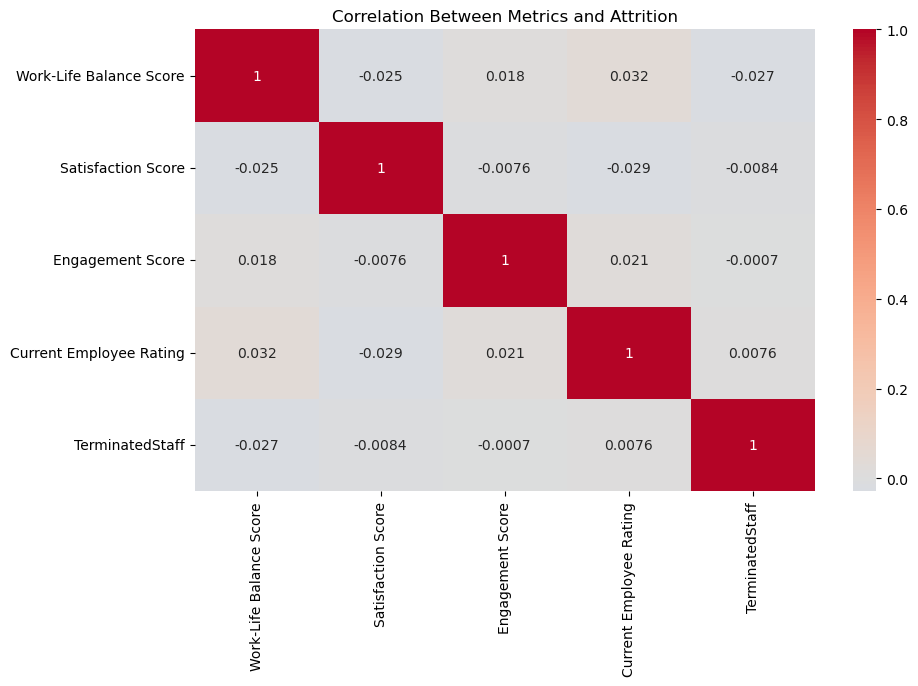

In [65]:
# Calculate correlation matrix
corr_matrix = df[['Work-Life Balance Score', 'Satisfaction Score', 
                 'Engagement Score', 'Current Employee Rating', 
                 'TerminatedStaff']].corr()

# Visualize with heatmap
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Metrics and Attrition")

In [66]:
# Compare scores between groups
terminated_scores = df[df['TerminatedStaff']==1][['Work-Life Balance Score', 
                                           'Satisfaction Score',
                                           'Engagement Score']].mean()

active_scores = df[df['TerminatedStaff']==0][['Work-Life Balance Score', 
                                       'Satisfaction Score',
                                       'Engagement Score']].mean()

comparison = pd.DataFrame({'Active': active_scores, 
                          'Terminated': terminated_scores,
                          'Difference': active_scores - terminated_scores})
print(comparison)

                           Active  Terminated  Difference
Work-Life Balance Score  3.027267    2.952381    0.074886
Satisfaction Score       3.034083    3.010437    0.023646
Engagement Score         2.940695    2.938682    0.002013


(array([0, 1, 2]),
 [Text(0, 0, 'Work-Life Balance Score'),
  Text(1, 0, 'Satisfaction Score'),
  Text(2, 0, 'Engagement Score')])

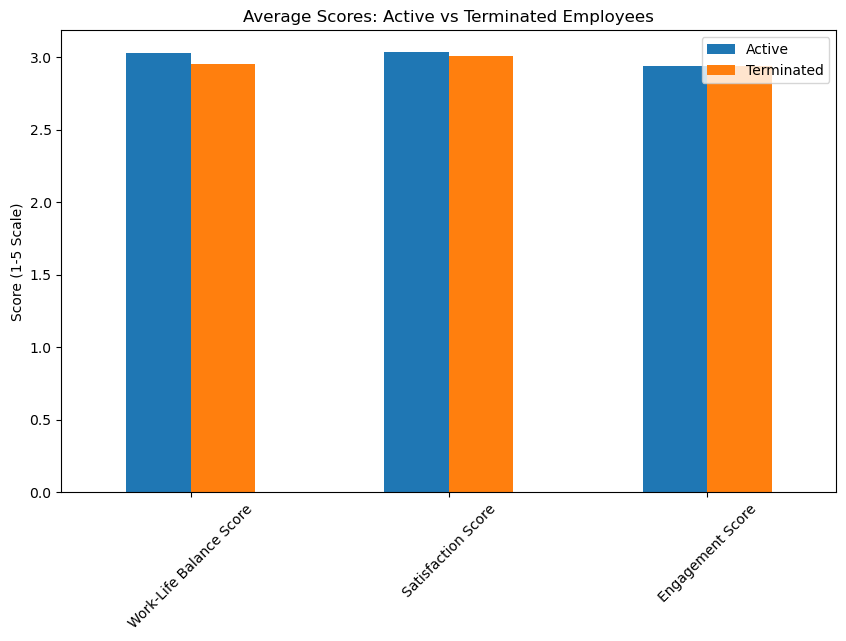

In [67]:
comparison[['Active', 'Terminated']].plot(kind='bar', figsize=(10,6))
plt.title("Average Scores: Active vs Terminated Employees")
plt.ylabel("Score (1-5 Scale)")
plt.xticks(rotation=45)

## Classification of Survey Scores into High, Medium, and Low Groups

In [68]:
def group(x):
    if x < 3:
        return 'Low'
    elif x < 4:
        return 'Medium'
    else:
        return 'High'
    
df['Total_Survey_Score'] = (df['Engagement Score'] + df['Satisfaction Score'] + df['Work-Life Balance Score'] )/3   
df['PerformanceGroup'] = df['Current Employee Rating'].apply(group)
df['EngagementGroup'] = df['Engagement Score'].apply(group)
df['SatisfactionGroup']=df['Satisfaction Score'].apply(group)
df['Work-Life_BalanceGroup']=df['Work-Life Balance Score'].apply(group)
df['Total_Survey_Group']=df['Total_Survey_Score'].apply(group)

In [69]:
df.to_csv("./cleaned_test_csv.csv")

In [70]:
grouped = df.groupby(['Faculty', 'PerformanceGroup','Total_Survey_Group']).agg(
    Total=('Employee ID', 'count'),
    Terminated=('TerminatedStaff', 'sum')
).reset_index()

grouped['AttritionRate'] = grouped['Terminated'] / grouped['Total'] *100

In [71]:
grouped

,Faculty,PerformanceGroup,Total_Survey_Group,Total,Terminated,AttritionRate
0,Faculty of Arts,High,High,22,12,54.545455
1,Faculty of Arts,High,Low,55,32,58.181818
2,Faculty of Arts,High,Medium,52,28,53.846154
3,Faculty of Arts,Low,High,18,8,44.444444
4,Faculty of Arts,Low,Low,66,35,53.030303
5,Faculty of Arts,Low,Medium,70,36,51.428571
6,Faculty of Arts,Medium,High,43,20,46.511628
7,Faculty of Arts,Medium,Low,145,74,51.034483
8,Faculty of Arts,Medium,Medium,120,61,50.833333
9,Faculty of Engineering,High,High,38,22,57.894737


In [72]:
grouped.to_csv('./survey_analysis.csv')

In [73]:
pivot = grouped.pivot_table(
    index=['PerformanceGroup', 'Total_Survey_Group'],
    values='AttritionRate',
    aggfunc='mean'
).reset_index()

In [74]:
pivot

,PerformanceGroup,Total_Survey_Group,AttritionRate
0,High,High,53.505705
1,High,Low,54.850574
2,High,Medium,51.221940
3,Low,High,49.318783
4,Low,Low,50.523088
5,Low,Medium,52.233154
6,Medium,High,49.473023
7,Medium,Low,52.523087
8,Medium,Medium,49.011955


In [75]:
df

,FirstName,LastName,StartDate,ExitDate,PositionTitle,Supervisor,ADEmail,Faculty,EmployeeStatus,EmployeeType,TerminationType,DOB,JobFunction,GenderCode,Current Employee Rating,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,StaffType,EmploymentDuration_months,TerminationYear,TerminationMonth,TerminationYearMonth,TenureGroup,EmploymentStatus,StatusValidated,TerminationCategory,VoluntaryTermination,InvoluntaryTermination,ActiveStaff,RetirementCategory,TerminatedStaff,RetainedOver2Years,Total_Survey_Score,PerformanceGroup,EngagementGroup,SatisfactionGroup,Work-Life_BalanceGroup,Total_Survey_Group
0,Aaden,Mercer,2023-07-26,NaT,Senior Research Fellow,Victoria Jacobs,aaden.mercer@bilearner.com,Faculty of Medicine,Active,Part-Time,Unk,25/9/1983,Senior Research Fellow,Female,3,1808,2023-04-25,5,2,4,Academic,22.033333,Active,NaN,NaT,1-3yrs,Active,Active,Active,0,0,1,0,0,0,3.666667,Medium,High,Low,High,Medium
1,Aaliyah,Watts,2020-05-09,NaT,Senior Lecturer,Jared Whitehead,aaliyah.watts@bilearner.com,Faculty of Medicine,Active,Contract,Unk,11/4/1962,Senior Lecturer,Male,3,3783,2023-03-07,3,4,3,Academic,61.133333,Active,NaN,NaT,5-10yrs,Active,Active,Active,0,0,1,0,0,1,3.333333,Medium,Medium,High,Medium,Medium
2,Aarav,Espinoza,2019-11-11,NaT,Officer,David Ali,aarav.espinoza@bilearner.com,Faculty of Arts,Active,Part-Time,Unk,15/12/1999,Administration-Officer,Male,2,2956,2023-02-06,5,4,1,Professional,67.133333,Active,NaN,NaT,5-10yrs,Active,Active,Active,0,0,1,0,0,1,3.333333,Low,High,High,Low,Medium
3,Aaron,Tapia,2023-01-20,NaT,Officer,Michael Reed,aaron.tapia@bilearner.com,Faculty of Arts,Active,Contract,Unk,18/1/2001,Student Services-Officer,Male,3,1538,2022-11-11,2,4,5,Professional,28.266667,Active,NaN,NaT,1-3yrs,Active,Active,Active,0,0,1,0,0,1,3.666667,Medium,Low,High,High,Medium
4,Aaron,Weber,2020-04-06,2023-07-24,Lecturer,Melanie Garcia,aaron.weber@bilearner.com,Faculty of Engineering,Active,Full-Time,Involuntary,27/10/1991,Lecturer,Male,2,3541,2022-11-28,1,3,3,Academic,40.133333,2023.0,7.0,2023-07,3-5yrs,Terminated,Terminated,Involuntary Departure,0,1,0,0,1,0,2.333333,Low,Low,Medium,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Zoey,Page,2019-05-06,2022-04-09,Professor,William Newman,zoey.page@bilearner.com,Faculty of Engineering,Active,Contract,Resignation,7/1/1987,Professor,Female,3,1817,2023-02-28,3,1,5,Academic,35.633333,2022.0,4.0,2022-04,1-3yrs,Terminated,Terminated,Voluntary Departure,1,0,0,0,1,0,3.000000,Medium,Medium,Low,High,Medium
2996,Zoey,Spence,2020-05-06,NaT,Senior Lecturer,Ian Price,zoey.spence@bilearner.com,Faculty of Medicine,Active,Full-Time,Unk,8/12/1955,Senior Lecturer,Male,3,1492,2023-04-17,4,5,2,Academic,61.233333,Active,NaN,NaT,5-10yrs,Active,Active,Active,0,0,1,0,0,1,3.666667,Medium,High,High,Low,Medium
2997,Zoie,Logan,2019-04-19,NaT,Lecturer,Heidi Terry,zoie.logan@bilearner.com,Faculty of Engineering,Active,Part-Time,Unk,17/9/1990,Lecturer,Male,1,3388,2022-10-09,3,1,3,Academic,74.000000,Active,NaN,NaT,5-10yrs,Active,Active,Active,0,0,1,0,0,1,2.333333,Low,Medium,Low,Medium,Low
2998,Zoie,Mercado,2020-12-01,NaT,Lecturer,David Young,zoie.mercado@bilearner.com,Faculty of Medicine,Active,Contract,Unk,19/8/1944,Lecturer,Female,3,1489,2022-10-13,3,5,2,Academic,54.266667,Active,NaN,NaT,3-5yrs,Active,Active,Active,0,0,1,0,0,1,3.333333,Medium,Medium,High,Low,Medium


##  Staff-Type Analysis Transformations

In [76]:
df['ExitYear'] = pd.to_datetime(df['ExitDate']).dt.year
# Staff-type attrition trends
staff_attrition = df.groupby(['Faculty','StaffType']).agg(
    TerminationCount=('TerminatedStaff','sum'),
    VoluntaryTermination=('VoluntaryTermination','sum'),
    InvoluntaryTermination=('InvoluntaryTermination','sum'),
    RetirementCategory=('RetirementCategory','sum'),
    ActiveStaff=('ActiveStaff','sum'),
    TotalStaff=('Employee ID','count')
).reset_index()

In [77]:
staff_attrition

,Faculty,StaffType,TerminationCount,VoluntaryTermination,InvoluntaryTermination,RetirementCategory,ActiveStaff,TotalStaff
0,Faculty of Arts,Academic,209,100,53,56,181,390
1,Faculty of Arts,Professional,97,42,32,23,104,201
2,Faculty of Engineering,Academic,326,170,79,77,276,602
3,Faculty of Engineering,Professional,141,77,25,39,161,302
4,Faculty of Medicine,Academic,489,235,131,123,483,972
5,Faculty of Medicine,Professional,271,144,68,59,262,533


In [78]:
df['Year'] = pd.to_datetime(df['ExitDate']).dt.year
terminated_df = df[df['TerminatedStaff'] == 1]

grouped = terminated_df.groupby(['Faculty', 'Year']).size().reset_index(name='Terminations')
grouped['CumulativeTerminations'] = grouped.groupby('Faculty')['Terminations'].cumsum()

In [79]:
grouped

,Faculty,Year,Terminations,CumulativeTerminations
0,Faculty of Arts,2019.0,23,23
1,Faculty of Arts,2020.0,24,47
2,Faculty of Arts,2021.0,61,108
3,Faculty of Arts,2022.0,90,198
4,Faculty of Arts,2023.0,108,306
5,Faculty of Engineering,2018.0,1,1
6,Faculty of Engineering,2019.0,9,10
7,Faculty of Engineering,2020.0,43,53
8,Faculty of Engineering,2021.0,81,134
9,Faculty of Engineering,2022.0,139,273


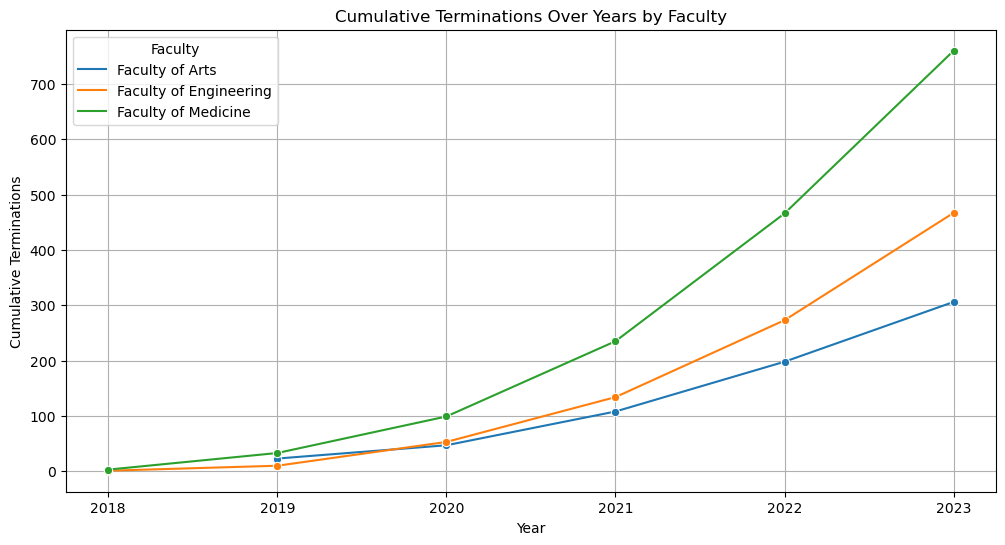

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Year', y='CumulativeTerminations', hue='Faculty', marker='o')

plt.title('Cumulative Terminations Over Years by Faculty')
plt.ylabel('Cumulative Terminations')
plt.xlabel('Year')
plt.legend(title='Faculty')
plt.grid(True)
plt.show()
